# Método para la generación de v.a. Poisson

# Generador

In [1]:
sem = 2222
def congruencial_mixto(cantidad=10, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    numeros = []
    xo = sem
    a = a
    c = c
    m = m
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros;

# Variable poisson

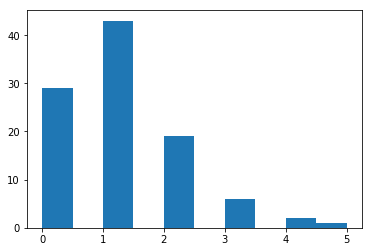

In [128]:
from math import exp
import time
import numpy as np
import random
sem = 0
def variable_poisson(lamda):
    i = 0
    p = exp(-lamda)
    F = p
    U = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
    while U >= F:
        p = lamda * p /(i + 1)
        F = F + p
        i = i + 1
        #U = congruencial_mixto(semilla=U,cantidad=1, a=22695477, c=3, m=74207281)[0]
    return i
valores = []
for i in range(0,100):
    valores.append(variable_poisson(1))
from matplotlib.pylab import hist, show
hist(valores)
show()

# Variable binomial

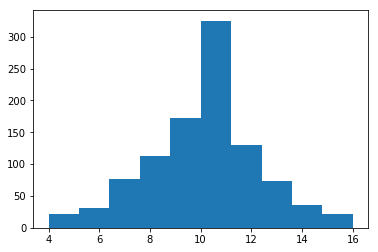

In [2]:
def variable_binomial(n, p):
    c = p / (1 - p)
    i = 0
    pr = (1 - p) ** n
    F = pr
    U = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
    while U >= F:
        pr = (c * (n - i) / (1 + i)) * pr
        F = F + pr
        i = i + 1
    return i
valores = []
for i in range(0,1000):
    r = variable_binomial(20, 0.5)
    valores.append(r)
from matplotlib.pylab import hist, show
hist(valores)
show()

# Aceptación y rechazo

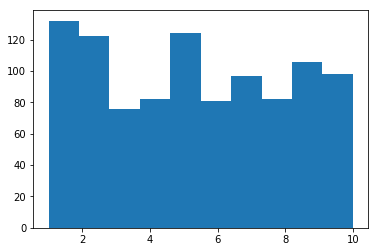

In [156]:
import random
def aceptacion_y_rechazo(pj, qj):
    c = max(pj)/qj
    numero = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
    Y = int(10 * numero) + 1
    U2 = congruencial_mixto(cantidad=1)[0]
    while U2 > ((pj[Y-1])/(c*qj)):
        numero = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
        Y = int(10 * numero) + 1
        U2 = congruencial_mixto(cantidad=1)[0]
    return Y
valores = []
for i in range(0,1000):
    pj = [0.11, 0.12, 0.09, 0.08, 0.12, 0.10, 0.09, 0.09, 0.10, 0.10]
    qj = 1/10
    valores.append((aceptacion_y_rechazo(pj, qj)))
from matplotlib.pylab import hist, show
hist(valores)
show()

# Método de composición

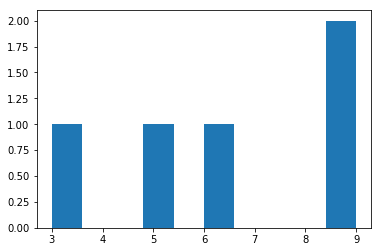

[6, 5, 9, 3, 9]


In [86]:
import random
def metodo_composicion():
    U1 = random.uniform(0,1)
    U2 = congruencial_mixto(cantidad=1)[0]
    X = 0
    if U1 < (0.5):
        X = int(10 * U2) + 1
    else:
        X = int(5 * U2) + 6
    return X
valores = []
for i in range(0,100):
    valores.append(metodo_composicion())
from matplotlib.pylab import hist, show
hist(valores)
show()

# Ejercicios Cap 4

In [126]:
# Ejercicio 1
import random
def metodo_composicion():
    U1 = random.uniform(0,1)
    U2 = congruencial_mixto(cantidad=1)[0]
    X = 0
    if U1 < (0.3):
        X = 1
    else:
        X = 2
    return X
valores = []
count = 0
for i in range(0,100):
    valor = metodo_composicion()
    if valor == 1:
        count = count + 1
    valores.append(valor)
print ("cantidad de elementos 1 generados con 100:", count)
count = 0
for i in range(0,1000):
    valor = metodo_composicion()
    if valor == 1:
        count = count + 1
    valores.append(valor)
print ("cantidad de elementos 1 generados con 1000:", count)
count = 0
for i in range(0,10000):
    valor = metodo_composicion()
    if valor == 1:
        count = count + 1
    valores.append(valor)
print ("cantidad de elementos 1 generados con 10000:", count)
count = 0


#print (valores)

cantidad de elementos 1 generados con 100: 28
cantidad de elementos 1 generados con 1000: 306
cantidad de elementos 1 generados con 10000: 2940


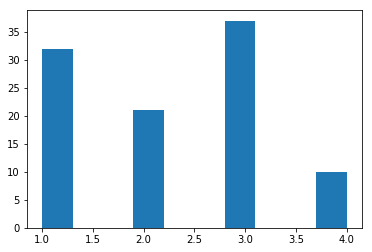

In [120]:
# Ejercicio 3
def aceptacion_y_rechazo(pj, qj):
    c = max(pj)/qj
    numero = congruencial_mixto(cantidad=1)[0]
    Y = int(4 * numero) + 1
    U2 = congruencial_mixto(cantidad=1)[0]
    while U2 > ((pj[Y-1])/(c*qj)):
        numero = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
        Y = int(4 * numero) + 1
        U2 = congruencial_mixto(cantidad=1)[0]
    return Y
valores = []
for i in range(0,100):
    pj = [0.3, 0.2, 0.35, 0.15]
    qj = 1/4
    valores.append((aceptacion_y_rechazo(pj, qj)))
from matplotlib.pylab import hist, show
hist(valores)
show()

lanzamientos necesarios 56


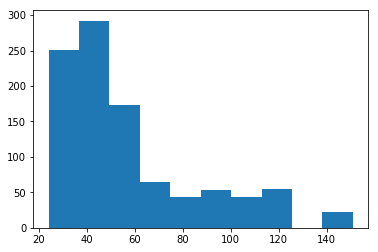

In [154]:
# Punto 7 ejercicios
def aceptacion_y_rechazo(pj, qj):
    c = max(pj)/qj
    numero = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
    Y = int(11 * numero) + 2
    U2 = congruencial_mixto(cantidad=1)[0]
    while U2 > ((pj[Y-2])/(c*qj)):
        numero = congruencial_mixto(cantidad=1, a=22695477, c=3, m=74207281)[0]
        Y = int(11 * numero) + 1
        U2 = congruencial_mixto(cantidad=1)[0]
    return Y
valores = []
pj = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

qj = 1/11
for i in range(0,1000):
    x = list(range(2,13))
    con = 0
    while sum(x)!=0:
        x[((aceptacion_y_rechazo(pj, qj)))-2]=0
        con = con + 1
    valores.append(con)
print ("lanzamientos necesarios", sum(valores)//len(valores))
from matplotlib.pylab import hist, show
hist(valores)
show()

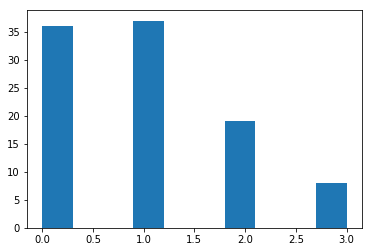

promedio: 0.99
varianza 0.8699000000000002


In [172]:
# Punto 7
def variable_binomial(n, p):
    c = p / (1 - p)
    i = 0
    pr = (1 - p) ** n
    F = pr
    U = congruencial_mixto(cantidad=1)[0]
    while U >= F:
        pr = (c * (n - i) / (1 + i)) * pr
        F = F + pr
        i = i + 1
    return i
valores = []
for i in range(0,100):
    r = variable_binomial(100, 1/100)
    valores.append(r)
from matplotlib.pylab import hist, show
hist(valores)
show()
prom = sum(valores)/len(valores)
print ("promedio:", prom)
var = 0
for ele in valores:
    var = var + (ele - prom) ** 2
var = var / len(valores)
print ("varianza", var)